In [13]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the .mat file
data = sio.loadmat('/Users/ananyayadav/phase_1_kafka_setup/received_traffic_dataset.mat')

# Extract relevant data
X_train = data['tra_X_tr'].squeeze()
Y_train = data['tra_Y_tr']
adj_matrix = data['tra_adj_mat']

# Create DataFrames
df_traffic = pd.DataFrame(Y_train.T, columns=[f'sensor_{i}' for i in range(Y_train.shape[0])])

# Create a relative time index
df_traffic['time_step'] = pd.timedelta_range(start='0 days', periods=len(df_traffic), freq='15T')
df_traffic.set_index('time_step', inplace=True)

/var/folders/jv/9vqqblpx36sfcczg3dqb27080000gn/T/ipykernel_52665/1078588276.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_traffic['time_step'] = pd.timedelta_range(start='0 days', periods=len(df_traffic), freq='15T')


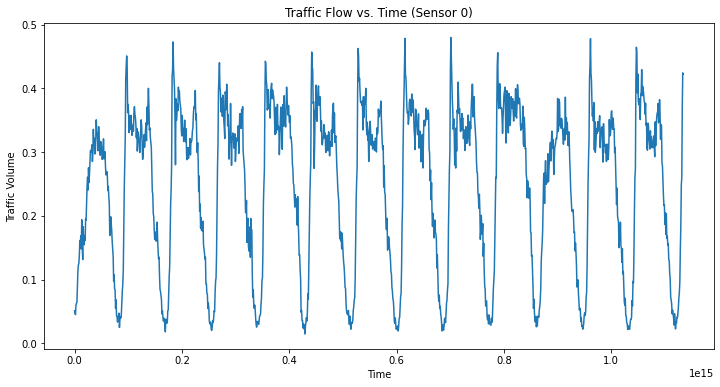

In [15]:
# Visualizations
plt.figure(figsize=(12, 6))
plt.plot(df_traffic.index, df_traffic['sensor_0'])
plt.title('Traffic Flow vs. Time (Sensor 0)')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.savefig('traffic_flow_vs_time.png')
plt.show()
plt.close()

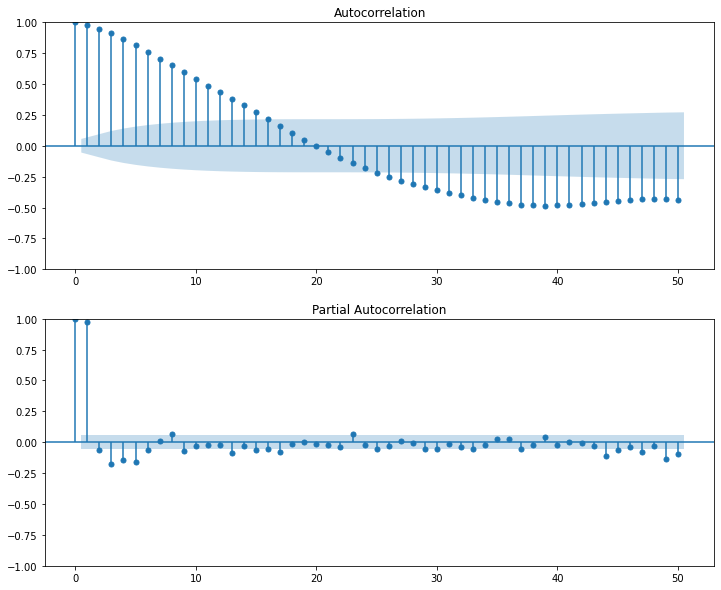

In [17]:
# ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
plot_acf(df_traffic['sensor_0'], ax=ax1, lags=50)
plot_pacf(df_traffic['sensor_0'], ax=ax2, lags=50)
plt.savefig('acf_pacf_plots.png')
plt.show()
plt.close()

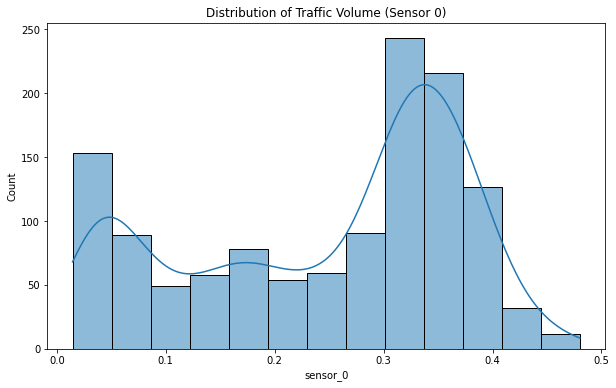

In [18]:
# 3. Histogram of traffic volume (using the first sensor as an example)
plt.figure(figsize=(10, 6))
sns.histplot(df_traffic['sensor_0'], kde=True)
plt.title('Distribution of Traffic Volume (Sensor 0)')
plt.savefig('traffic_volume_distribution.png')
plt.show()
plt.close()

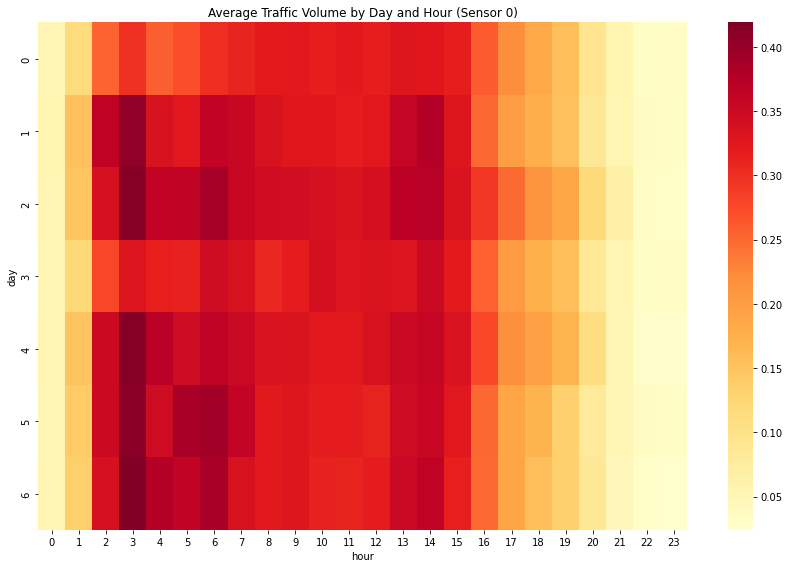

In [20]:
# 4. Heatmap of traffic volume by day and hour (using the first sensor as an example)
df['day'] = df.index.dayofweek
df['hour'] = df.index.hour
pivot = df.pivot_table(values='sensor_0', index='day', columns='hour', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title('Average Traffic Volume by Day and Hour (Sensor 0)')
plt.tight_layout()
plt.savefig('traffic_volume_heatmap.png')
plt.show()
plt.close()

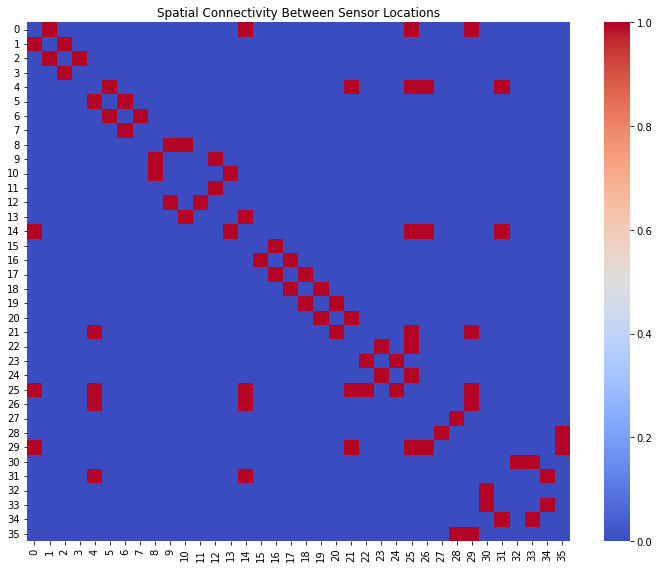

In [10]:
# 5. Spatial connectivity heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(adj_matrix, cmap='coolwarm')
plt.title('Spatial Connectivity Between Sensor Locations')
plt.tight_layout()
plt.savefig('spatial_connectivity_heatmap.png')
plt.show()
plt.close()

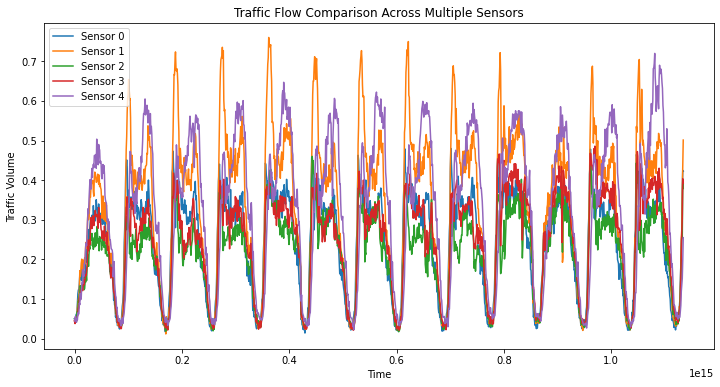

In [22]:
# Multiple sensor comparison
plt.figure(figsize=(12, 6))
for i in range(5):  # Plot first 5 sensors
    plt.plot(df_traffic.index, df_traffic[f'sensor_{i}'], label=f'Sensor {i}')
plt.title('Traffic Flow Comparison Across Multiple Sensors')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.savefig('multi_sensor_comparison.png')
plt.show()
plt.close()